In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
#read data
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [4]:
# menampilkan 5 baris kolom
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Bagian Baru

In [5]:
# cek jumlah baris, kolom, info

print(df.shape)
print("=================\n")
print(df.info())
print("=================\n")
print(df.isnull().sum())
print("=================\n")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)
print("=================\n")

(541909, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country      

In [6]:
# Cek jumlah data duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

# Hapus data duplikat
df_cleaned = df.drop_duplicates()

# Cek ulang ukuran data setelah duplikat dihapus
print("Ukuran data setelah menghapus duplikat:", df_cleaned.shape)


Jumlah data duplikat: 5268
Ukuran data setelah menghapus duplikat: (536641, 8)


In [7]:
# Pastikan df_cleaned adalah salinan dan bukan view
df_cleaned = df.copy()

# Isi missing value dengan .loc
df_cleaned.loc[df_cleaned['Description'].isna(), 'Description'] = 'No Description'

# Mengubah CustomerID menjadi tipe object
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype('object')
df_cleaned.loc[df_cleaned['CustomerID'].isna(), 'CustomerID'] = 'Unknown'


In [8]:
# Cek missing value pada kolom CustomerID
print(df_cleaned['Description'].isna().sum())


0


In [9]:
# Mengonversi InvoiceDate ke tipe data datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce')

# Verifikasi tipe data setelah konversi
print(df_cleaned['InvoiceDate'].dtype)


datetime64[ns]


In [10]:
# analis utama
# Menambahkan kolom total harga untuk tiap transaksi
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Menampilkan total keseluruhan nilai penjualan
total_penjualan = df_cleaned['TotalPrice'].sum()
print(f"Total nilai penjualan: £{total_penjualan:,.2f}")


Total nilai penjualan: £9,747,747.93


In [11]:
# Mengelompokkan berdasarkan deskripsi produk dan menjumlahkan quantity
produk_terlaris = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Menampilkan 10 produk terlaris
top_10_produk = produk_terlaris.head(10)
print(top_10_produk)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64


In [12]:
# Mengelompokkan berdasarkan negara dan menjumlahkan quantity
pembelian_per_negara = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Menampilkan 10 negara dengan pembelian terbanyak
top_10_negara = pembelian_per_negara.head(10)
print(top_10_negara)


Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


In [13]:
# Hitung jumlah transaksi unik per pelanggan
loyal_customers = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

# Tampilkan 10 pelanggan paling loyal
top_10_loyal_customers = loyal_customers.head(10)
print(top_10_loyal_customers)


CustomerID
Unknown    3710
14911.0     248
12748.0     224
17841.0     169
14606.0     128
13089.0     118
15311.0     118
12971.0      89
14527.0      86
13408.0      81
Name: InvoiceNo, dtype: int64


In [14]:
# Kembalikan index ke kolom jika perlu
df_cleaned.reset_index(inplace=True)

# Buat kolom baru 'Revenue'
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Pastikan kolom waktu sudah dalam format datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Set kolom waktu sebagai index
df_cleaned.set_index('InvoiceDate', inplace=True)

# Resample per bulan dan hitung total pendapatan
monthly_revenue = df_cleaned['Revenue'].resample('ME').sum()

# Mengubah format pendapatan menjadi mata uang
monthly_revenue = monthly_revenue.apply(lambda x: f'£{x:,.2f}')

# Tampilkan hasil
print(monthly_revenue)


InvoiceDate
2010-12-31      £748,957.02
2011-01-31      £560,000.26
2011-02-28      £498,062.65
2011-03-31      £683,267.08
2011-04-30      £493,207.12
2011-05-31      £723,333.51
2011-06-30      £691,123.12
2011-07-31      £681,300.11
2011-08-31      £682,680.51
2011-09-30    £1,019,687.62
2011-10-31    £1,070,704.67
2011-11-30    £1,461,756.25
2011-12-31      £433,668.01
Freq: ME, Name: Revenue, dtype: object


In [15]:
# Kembalikan index ke kolom jika perlu
df_cleaned.reset_index(inplace=True)

# Buat kolom baru 'Revenue'
df_cleaned['Revenue_Weekly'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Pastikan kolom waktu sudah dalam format datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Set kolom waktu sebagai index
df_cleaned.set_index('InvoiceDate', inplace=True)

# Resample per bulan dan hitung total pendapatan
weekly_revenue = df_cleaned['Revenue_Weekly'].resample('W').sum()

# Mengubah format pendapatan menjadi mata uang
weekly_revenue = weekly_revenue.apply(lambda x: f'£{x:,.2f}')

# Tampilkan hasil
print(weekly_revenue)


InvoiceDate
2010-12-05    £181,847.25
2010-12-12    £270,287.03
2010-12-19    £207,052.17
2010-12-26     £89,770.57
2011-01-02          £0.00
2011-01-09     £93,720.93
2011-01-16    £190,994.96
2011-01-23    £133,782.91
2011-01-30    £119,136.81
2011-02-06    £123,642.18
2011-02-13    £102,296.93
2011-02-20    £139,664.58
2011-02-27    £133,069.93
2011-03-06    £130,435.56
2011-03-13    £129,180.96
2011-03-20    £145,262.61
2011-03-27    £147,909.80
2011-04-03    £183,501.71
2011-04-10    £121,598.22
2011-04-17    £147,459.77
2011-04-24    £115,461.25
2011-05-01     £84,382.66
2011-05-08    £130,354.31
2011-05-15    £205,445.23
2011-05-22    £198,031.53
2011-05-29    £160,569.82
2011-06-05    £116,932.52
2011-06-12    £177,916.87
2011-06-19    £184,016.50
2011-06-26    £117,086.71
2011-07-03    £136,287.44
2011-07-10    £174,659.17
2011-07-17    £124,163.17
2011-07-24    £182,513.96
2011-07-31    £180,814.85
2011-08-07    £153,176.20
2011-08-14    £161,417.02
2011-08-21    £170,724.89


In [16]:
# Kembalikan index ke kolom jika perlu
df_cleaned.reset_index(inplace=True)

# Buat kolom baru 'Revenue'
df_cleaned['Revenue_Daily'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Pastikan kolom waktu sudah dalam format datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Set kolom waktu sebagai index
df_cleaned.set_index('InvoiceDate', inplace=True)

# Resample per bulan dan hitung total pendapatan
daily_revenue = df_cleaned['Revenue_Daily'].resample('D').sum()

# Mengubah format pendapatan menjadi mata uang
daily_revenue = daily_revenue.apply(lambda x: f'£{x:,.2f}')

# Tampilkan hasil
print(daily_revenue)


InvoiceDate
2010-12-01    £58,635.56
2010-12-02    £46,207.28
2010-12-03    £45,620.46
2010-12-04         £0.00
2010-12-05    £31,383.95
                 ...    
2011-12-05    £57,751.32
2011-12-06    £54,228.37
2011-12-07    £75,076.22
2011-12-08    £81,417.78
2011-12-09    £32,131.53
Freq: D, Name: Revenue_Daily, Length: 374, dtype: object


In [17]:
# Tampilkan seluruh perubahan pada 5 baris pertama
print(df_cleaned.head())


                     index InvoiceNo StockCode  \
InvoiceDate                                      
2010-12-01 08:26:00      0    536365    85123A   
2010-12-01 08:26:00      1    536365     71053   
2010-12-01 08:26:00      2    536365    84406B   
2010-12-01 08:26:00      3    536365    84029G   
2010-12-01 08:26:00      4    536365    84029E   

                                             Description  Quantity  UnitPrice  \
InvoiceDate                                                                     
2010-12-01 08:26:00   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55   
2010-12-01 08:26:00                  WHITE METAL LANTERN         6       3.39   
2010-12-01 08:26:00       CREAM CUPID HEARTS COAT HANGER         8       2.75   
2010-12-01 08:26:00  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39   
2010-12-01 08:26:00       RED WOOLLY HOTTIE WHITE HEART.         6       3.39   

                    CustomerID         Country  TotalPrice  Revenue  \
InvoiceDat

In [ ]:
# Menyimpan DataFrame yang telah dibersihkan ke CSV baru
df_cleaned.to_csv('cleaned_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

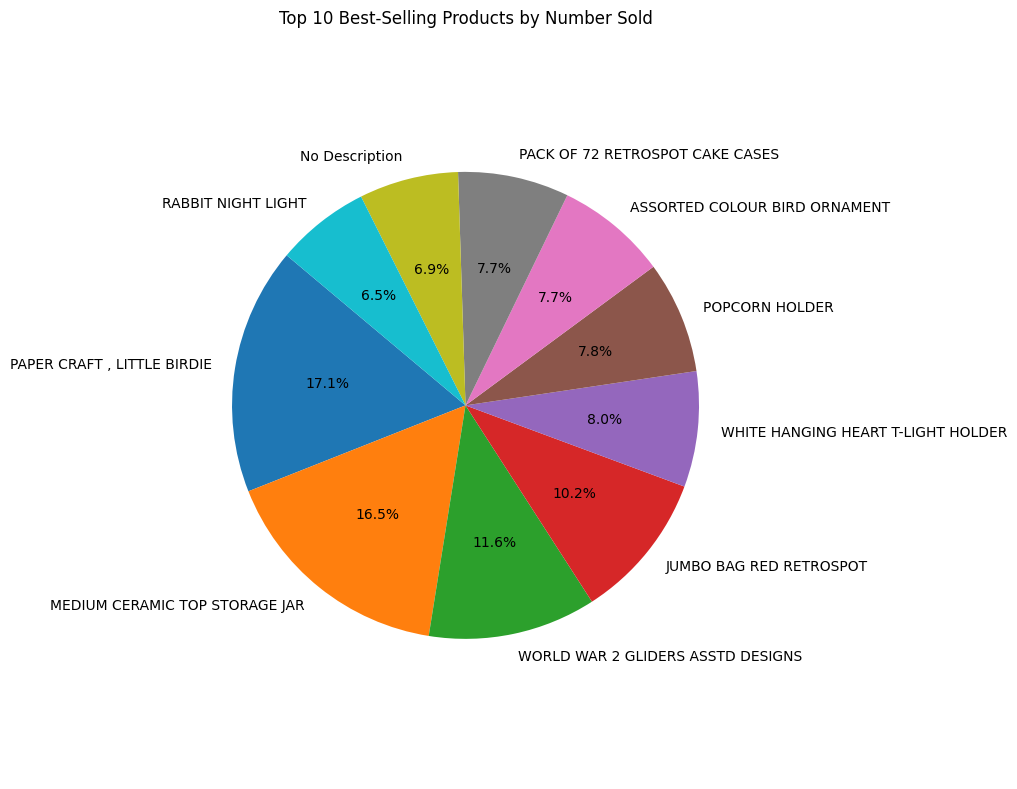

In [25]:
#visualisasi data
# pie chart kategori produk

import matplotlib.pyplot as plt

# Ambil 10 produk terlaris berdasarkan Quantity (hanya yang Quantity > 0)
top_products = df_cleaned[df_cleaned['Quantity'] > 0] \
    .groupby('Description')['Quantity'].sum() \
    .sort_values(ascending=False).head(10)

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Best-Selling Products by Number Sold')
plt.axis('equal')  # Agar pie chart berbentuk bulat sempurna
plt.tight_layout()
plt.show()


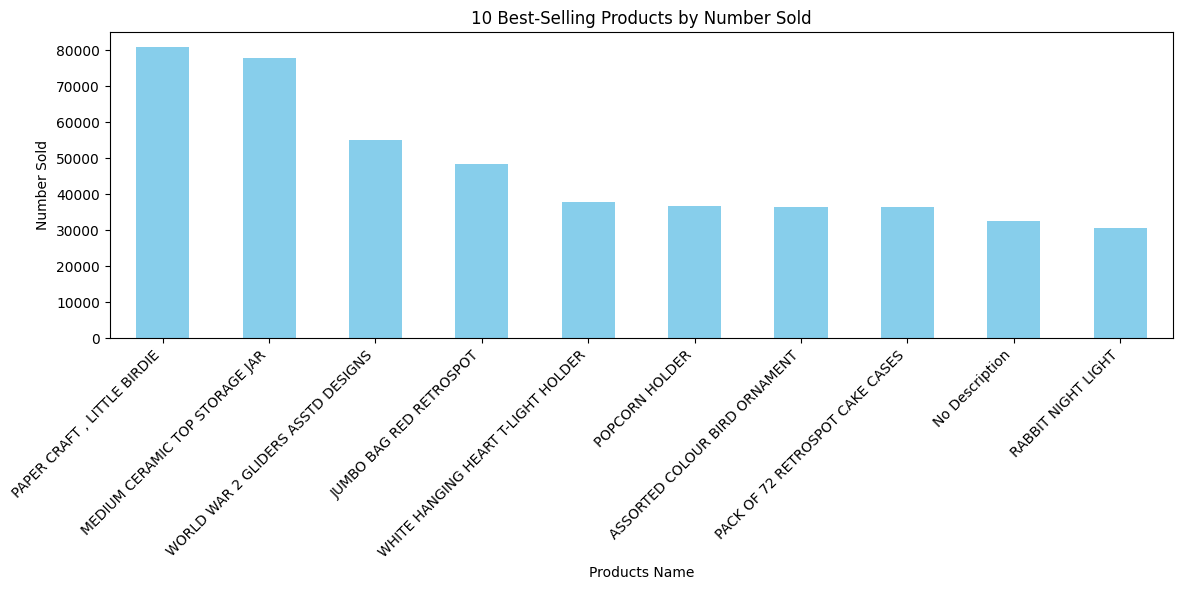

In [26]:
# Bar Chart produk terlaris

import matplotlib.pyplot as plt

# Ambil 10 produk dengan quantity terbanyak
top_products = df_cleaned[df_cleaned['Quantity'] > 0] \
    .groupby('Description')['Quantity'].sum() \
    .sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('10 Best-Selling Products by Number Sold')
plt.xlabel('Products Name')
plt.ylabel('Number Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


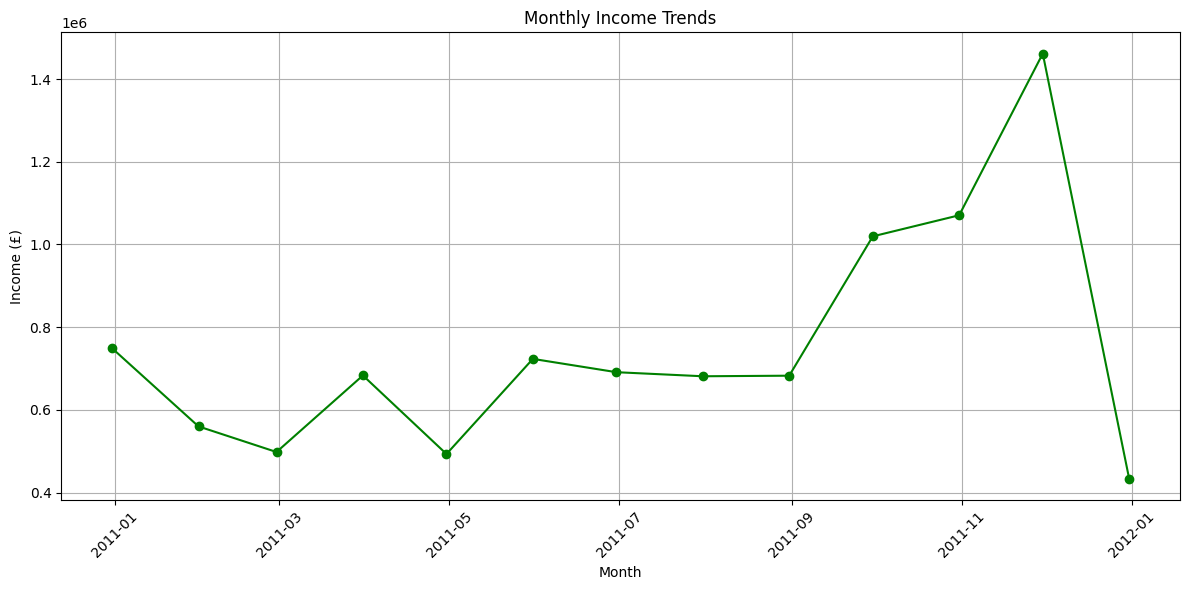

In [27]:
# Line Plot penjualan per bulan

import matplotlib.pyplot as plt

# kolom waktu sudah jadi index dan Revenue sudah dihitung
# df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
# df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
# df_cleaned.set_index('InvoiceDate', inplace=True)

# Resample data bulanan dan jumlahkan Revenue
monthly_revenue = df_cleaned['Revenue'].resample('ME').sum()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-', color='green')
plt.title('Monthly Income Trends')
plt.xlabel('Month')
plt.ylabel('Income (£)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


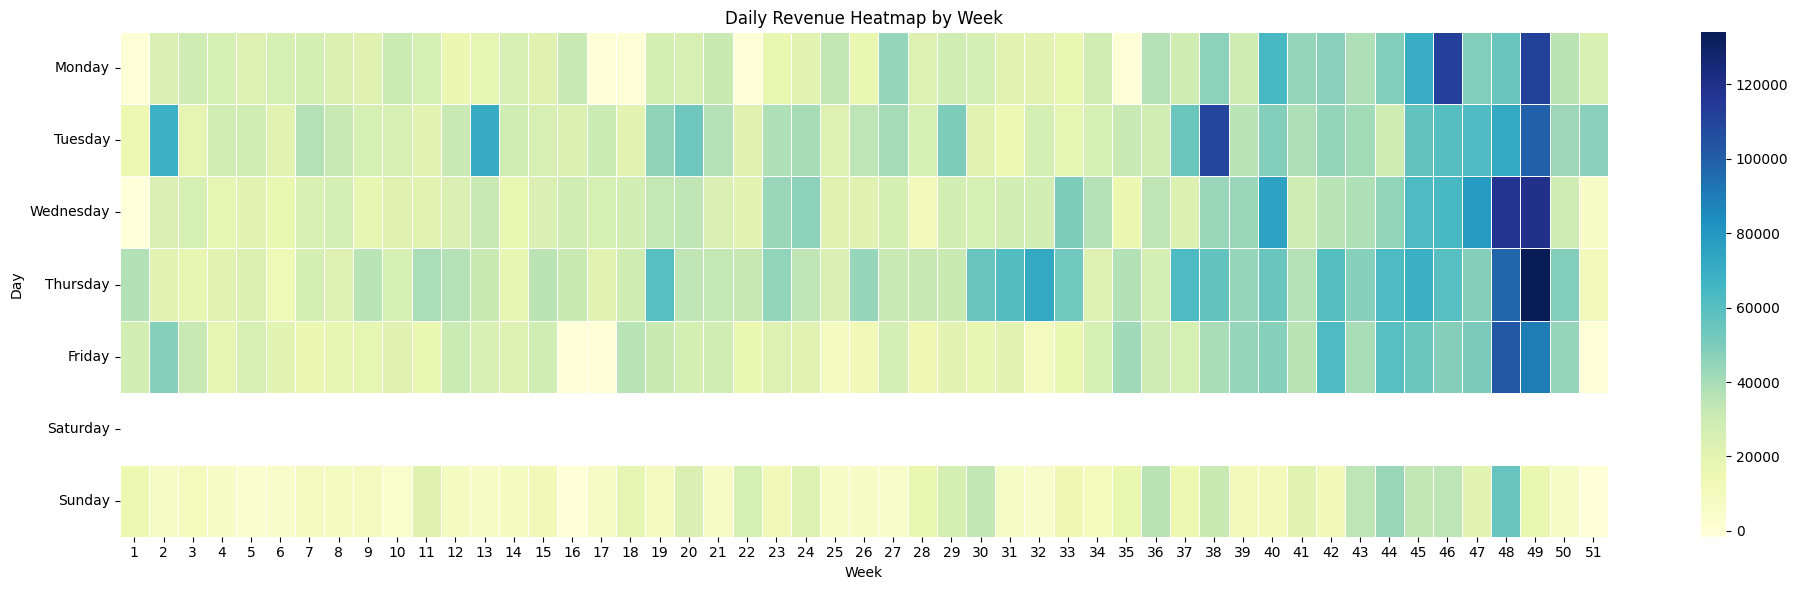

In [28]:
# Heatmap jumlah order per minggu dan per hari

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Kembalikan index ke kolom
df_cleaned.reset_index(inplace=True)

# Pastikan InvoiceDate dalam format datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Buat kolom Hari dan Minggu
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['Week'] = df_cleaned['InvoiceDate'].dt.isocalendar().week
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year

# Buat pivot table: jumlah revenue
heatmap_data = df_cleaned.groupby(['DayOfWeek', 'Week'])['Revenue'].sum().reset_index()

# Ubah ke bentuk matriks
pivot_table = heatmap_data.pivot_table(index='DayOfWeek', columns='Week', values='Revenue', fill_value=0)

# Urutkan nama hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Daily Revenue Heatmap by Week')
plt.xlabel('Week')
plt.ylabel('Day')
plt.tight_layout()
plt.show()

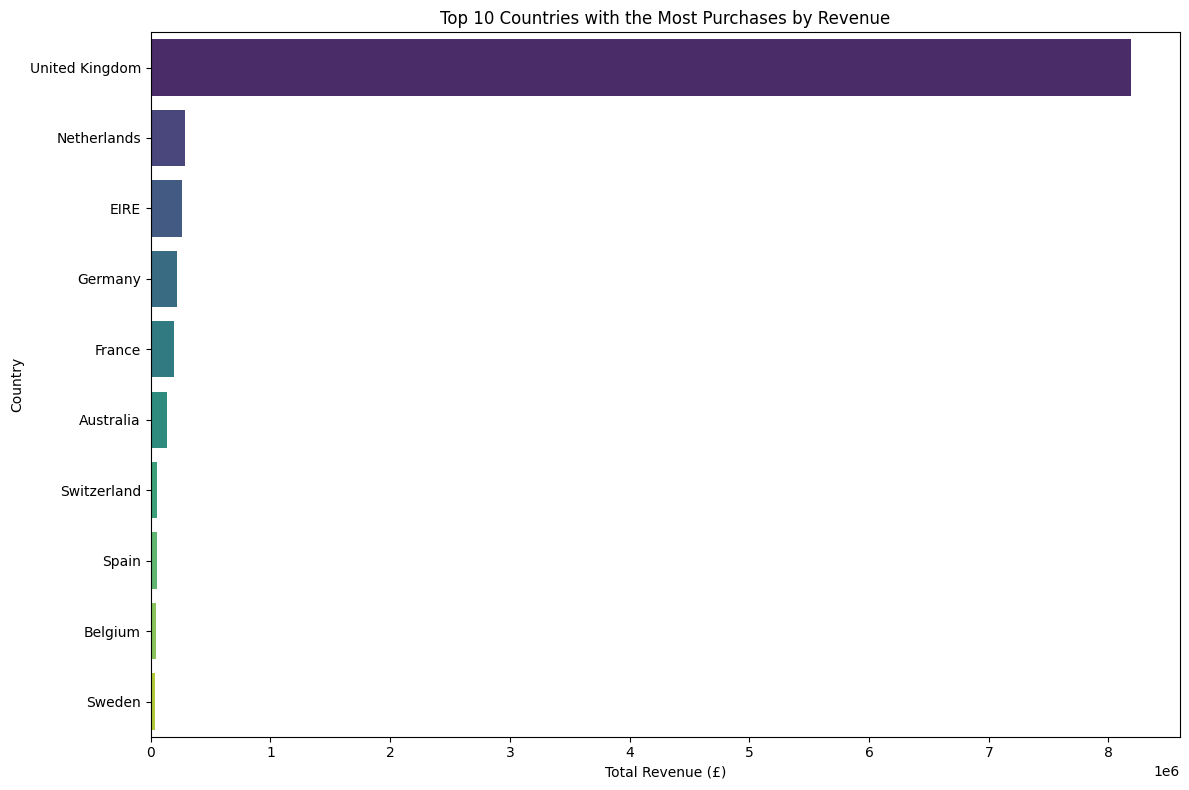

In [30]:
# Negara dengan pembelian terbanyak

import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total revenue per negara
top_countries = df_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Ubah ke DataFrame agar bisa pakai hue
df_top_countries = top_countries.reset_index()
df_top_countries.columns = ['Country', 'Revenue']

# Visualisasi dengan seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_top_countries,
    x='Revenue',
    y='Country',
    hue='Country',
    palette='viridis',
    dodge=False,
    legend=False  # agar tidak muncul legend
)

plt.title('Top 10 Countries with the Most Purchases by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

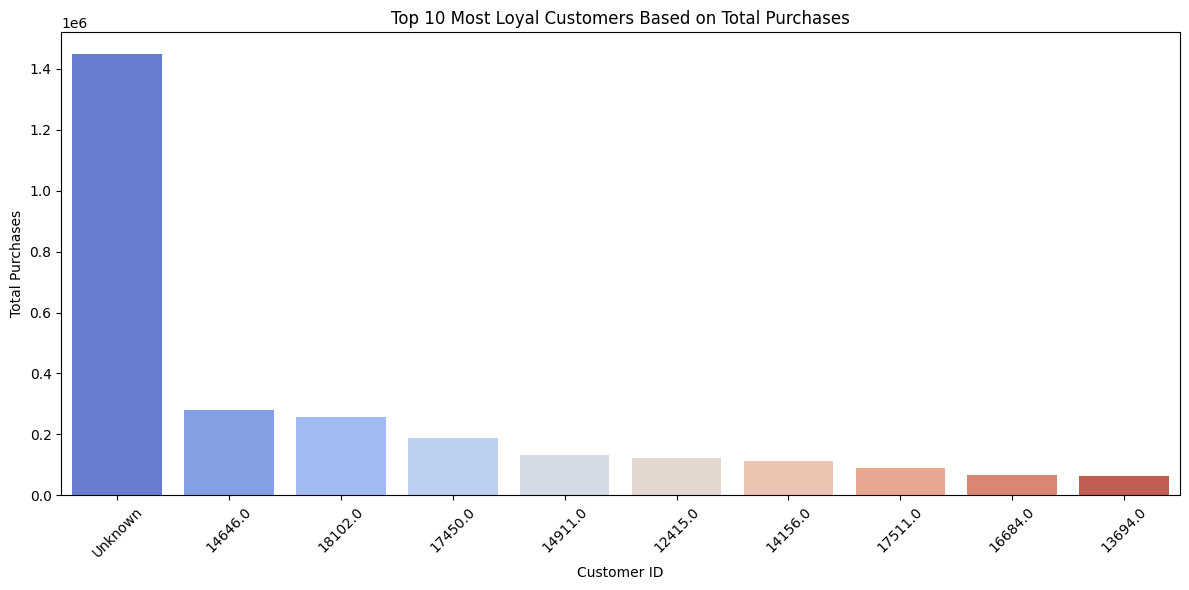

In [32]:
# Pelanggan paling loyal berdasarkan total pembelian

import matplotlib.pyplot as plt
import seaborn as sns

# Berdasarkan total pembelian
loyal_customers = df_cleaned.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

# Ubah ke DataFrame
df_loyal_customers = loyal_customers.reset_index()
df_loyal_customers.columns = ['CustomerID', 'TotalPurchases']

# Plot barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_loyal_customers, x='CustomerID', y='TotalPurchases', hue='CustomerID', palette='coolwarm', legend=False)

plt.title('Top 10 Most Loyal Customers Based on Total Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [33]:
# Menyimpan DataFrame yang telah dibersihkan ke CSV baru
df_cleaned.to_csv('ecommerce_data_new.csv', index=False)

from google.colab import files
files.download('ecommerce_data_new.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>